Text(0.5, 1.0, 'Pretrained model new data points')

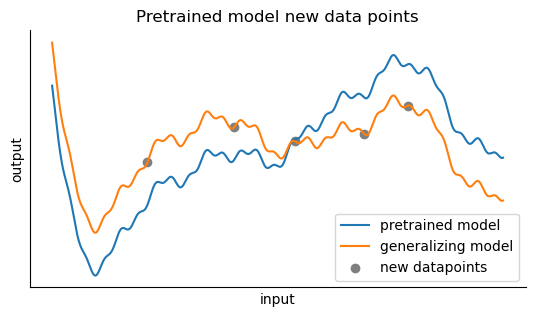

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange

fig,ax = plt.subplots(1)
ax.set_aspect(0.33)

x = np.linspace(-3.1,2.1,10001)
def polynomial(coefficients, x):
    y = np.zeros_like(x)
    for degree, coeff in enumerate(coefficients):
        y+= coeff * x ** degree
    return y
coefficients = np.array([12,28,11,-14,-8,2,1])
poly = lambda x: polynomial(coefficients/10,x)
noise = lambda x: 1/2 * np.sin(x*9)*np.sin(x*3) + 1/8* np.sin(32*x) 
f_PT = lambda x: poly(x) + noise(x)

y_PT = f_PT(x)
ax.plot(x,y_PT,label="pretrained model")


def diff_function(x):
    y = 1/(1+np.exp(3*x+1))
    y = 3*(y-0.5)
    return y
y_diff = diff_function(x)
f_FT = lambda x: f_PT(x) + diff_function(x)
y_FT = f_FT(x)

ax.plot(x,y_FT,label="generalizing model")


x_samples = np.array([-2, -1, -0.3, 0.5,1])
y_samples = f_FT(x_samples)
ax.scatter(x_samples,y_samples,label="new datapoints",c="tab:gray")

y_diff = y_samples-f_PT(x_samples)
# for x,y,dx,dy in zip(
#     x_samples,
#     f_PT(x_samples),
#     np.zeros_like(x_samples),
#     diff
#     ):

#     ax.arrow(x,y,dx,dy*0.9,head_width=0.1,length_includes_head=True,fc='k', ec='k')



# ax.plot(x,y_overfit,label="overfitting model")

ax.legend()

ax.set_xlabel('input')
ax.set_ylabel('output')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([-4.5,4.5])


# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.set_title("Pretrained model new data points")
# fig.savefig("img/fumbrella_mechanism_generalizing_model.pdf")

[-2.   -1.   -0.3   0.5   1.   -2.5  -1.5  -0.65  0.1   0.75  1.5 ]
[ 1.47992145  1.14239123 -0.07493756 -1.27242546 -1.44604137 -3.52143626
 -0.52651741 -0.24031526  1.5979698   3.20214511  1.26891892]
[-2.5  -2.   -1.5  -1.   -0.65 -0.3   0.1   0.5   0.75  1.    1.5 ]
[-3.52143626  1.47992145 -0.52651741  1.14239123 -0.24031526 -0.07493756
  1.5979698  -1.27242546  3.20214511 -1.44604137  1.26891892]


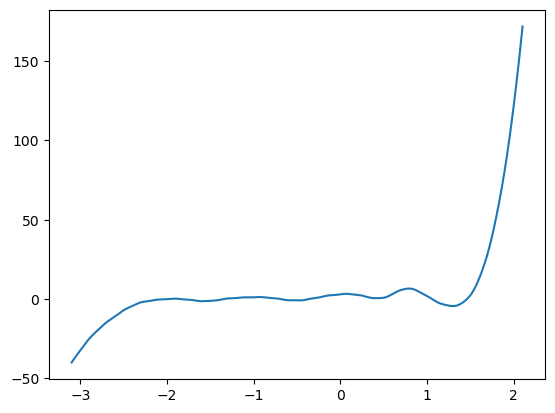

In [3]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange, CubicSpline


x_1 = np.array([-2.5,-1.5,-0.65,0.1,0.75,1.5])
y_1 = f_PT(x_1)

x_interp = np.concatenate([x_samples,x_1])
print(x_interp)
y_interp = np.concatenate([y_diff,y_1])
print(y_interp)
idx = x_interp.argsort()
x_interp = x_interp[idx]
print(x_interp)
y_interp = y_interp[idx]
print(y_interp)


# poly = lagrange(x_interp, y_interp)
# f_overfit = lambda x: Polynomial(poly.coef[::-1])(x)
cs = CubicSpline(x_interp,y_interp)
f_overfit = lambda x:  cs(x) + f_PT(x)
y_overfit = f_overfit(x)
plt.plot(x,y_overfit)

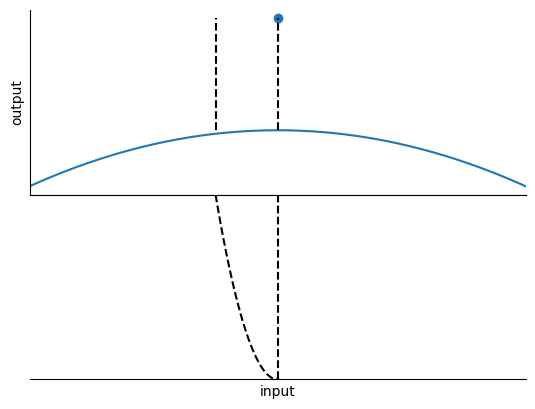

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange

fig, (ax0,ax1) = plt.subplots(2,1)
# ax.set_aspect(0.33)

interval = [-4,4]
x_no_dropout = np.array([0.0])
x_with_dropout = np.array([-1.0])
x = np.linspace(interval[0],interval[1],10001)
y_gap = 0.1

def polynomial(coefficients, x):
    y = np.zeros_like(x)
    for degree, coeff in enumerate(coefficients):
        y+= coeff * x ** degree
    return y
coefficients = np.array([0,0,-1/32])
poly = lambda x: polynomial(coefficients,x)
f_PT = lambda x: poly(x)

# TOP AXIS
y_PT = f_PT(x)
ax0.plot(x,y_PT,label="pretrained model")
y_no_dropout_pretrained = f_PT(x_no_dropout)
y_no_dropout_finetuned = f_PT(x_no_dropout)+1
ax0.scatter(
    x_no_dropout,
    y_no_dropout_finetuned,
    label="new datapoint"
    )

ax0.vlines(
    x=x_no_dropout,
    ymin=y_no_dropout_pretrained,
    ymax=y_no_dropout_finetuned,
    colors="k",
    linestyles="dashed"
    )

ax0.vlines(
    x=x_with_dropout,
    ymin=y_no_dropout_pretrained,
    ymax=y_no_dropout_finetuned,
    colors="k",
    linestyles="dashed"
    )

ax.annotate('input representation', xy=(1,0), xytext=(5, 1), ha='left', va='top',
            xycoords='axes fraction', textcoords='offset points')
ax0.set_ylabel('output')
ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax0.set_xticks([])
ax0.set_yticks([])
ax0.spines.right.set_visible(False)
ax0.spines.top.set_visible(False)
ax0.set_xlim(interval)
# ax0.set_ylim([y_no_dropout_pretrained.min()-y_gap,y_no_dropout_finetuned.max()])



# BOTTOM AXIS
l = ax1.vlines(x=x_no_dropout,ymin=0,ymax=1,colors="k",linestyles="dashed")
# l.set_dashes

x_temp = np.linspace(x_with_dropout,x_no_dropout,101)
y_temp = x_temp**2
plt.plot(x_temp,y_temp,c="k",linestyle="dashed")

ax1.set_xlabel('input')
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines.left.set_visible(False)
ax1.spines.right.set_visible(False)
ax1.set_ylim([0,1])
ax1.set_xlim(interval)
# ax1.spines.top.set_visible(False)



fig.subplots_adjust(hspace=0)
# fig.tight_layout()